In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
df.drop(columns=['Year_of_Release','Developer','Publisher','Platform'],inplace=True)


In [ ]:
df.head()

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Sports,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,E
1,Super Mario Bros.,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Racing,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Sports,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in range(len(df['User_Score'])):
  if type(df['User_Score'].iloc[i])==type("String") and df['User_Score'].iloc[i]!='tbd':
    df.loc[i,"User_Score"]=float(df['User_Score'].iloc[i])
  if df['User_Score'].iloc[i]=='tbd':
    df.loc[i,'User_Score']=0.0

In [ ]:
imputer=SimpleImputer(strategy='mean')
df.iloc[:,[7,8,9,10]]=imputer.fit_transform(df.iloc[:,[7,8,9,10]])
df.head()

<ipython-input-17-c900f14db99c>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,[7,8,9,10]]=imputer.fit_transform(df.iloc[:,[7,8,9,10]])


,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Sports,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.00000,322.000000,E
1,Super Mario Bros.,Platform,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,5.39981,162.229908,NaN
2,Mario Kart Wii,Racing,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.30000,709.000000,E
3,Wii Sports Resort,Sports,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.00000,192.000000,E
4,Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,5.39981,162.229908,NaN


In [ ]:
df.isnull().sum()

Name               2
Genre              2
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Rating          6769
dtype: int64

In [ ]:
imputer=SimpleImputer(strategy='constant',fill_value='NA')
df.iloc[:,[0,1,11]]=imputer.fit_transform(df.iloc[:,[0,1,11]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16719 non-null  object 
 1   Genre         16719 non-null  object 
 2   NA_Sales      16719 non-null  float64
 3   EU_Sales      16719 non-null  float64
 4   JP_Sales      16719 non-null  float64
 5   Other_Sales   16719 non-null  float64
 6   Global_Sales  16719 non-null  float64
 7   Critic_Score  16719 non-null  float64
 8   Critic_Count  16719 non-null  float64
 9   User_Score    16719 non-null  float64
 10  User_Count    16719 non-null  float64
 11  Rating        16719 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.5+ MB


In [ ]:
df.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000
mean,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,5.399810,162.229908
std,0.813514,0.503283,0.308818,0.186710,1.547935,9.723417,13.241001,2.569463,378.165132
min,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000,68.967679,22.000000,5.399810,30.000000
50%,0.080000,0.020000,0.000000,0.010000,0.170000,68.967679,26.360821,5.399810,162.229908
75%,0.240000,0.110000,0.040000,0.030000,0.470000,70.000000,26.360821,7.300000,162.229908
max,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [ ]:
df['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
NA                 2
Name: Genre, dtype: int64

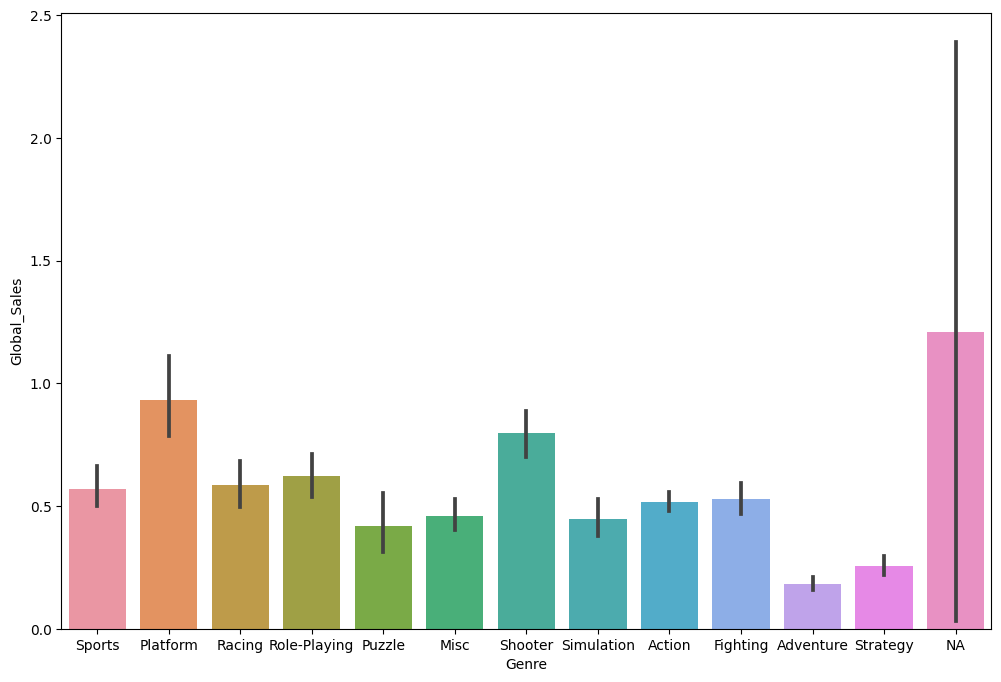

In [46]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['Genre'],y=df['Global_Sales'])
plt.show()

In [ ]:
df.groupby('Genre')['Global_Sales'].mean()

Genre
Action          0.517884
Adventure       0.182417
Fighting        0.527067
Misc            0.458960
NA              1.210000
Platform        0.932523
Puzzle          0.419000
Racing          0.583587
Role-Playing    0.622933
Shooter         0.795873
Simulation      0.446705
Sports          0.567291
Strategy        0.255490
Name: Global_Sales, dtype: float64

In [ ]:
df.groupby('Genre')['Critic_Score'].mean()

Genre
Action          67.656132
Adventure       68.066251
Fighting        69.088078
Misc            68.265909
NA              68.967679
Platform        68.458741
Puzzle          68.371541
Racing          68.371187
Role-Playing    70.778226
Shooter         69.833522
Simulation      68.827378
Sports          70.493484
Strategy        70.346538
Name: Critic_Score, dtype: float64

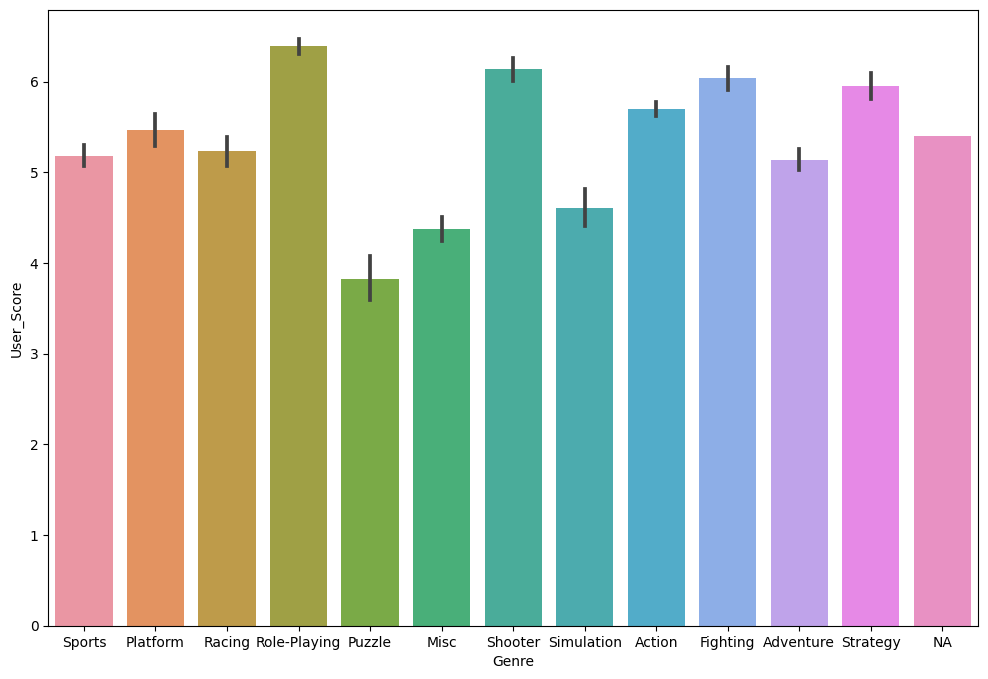

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['Genre'],y=df['User_Score'])
plt.show()

In [41]:
df.groupby('Genre')['User_Score'].mean()

Genre
Action          5.695632
Adventure       5.139939
Fighting        6.045962
Misc            4.370478
NA              5.399810
Platform        5.471103
Puzzle          3.827163
Racing          5.232289
Role-Playing    6.391308
Shooter         6.142587
Simulation      4.612179
Sports          5.183493
Strategy        5.954520
Name: User_Score, dtype: float64

In [47]:
rdata=df.iloc[:,2:11]

In [48]:
rdata.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.00000,322.000000
1,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,5.39981,162.229908
2,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.30000,709.000000
3,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.00000,192.000000
4,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,5.39981,162.229908


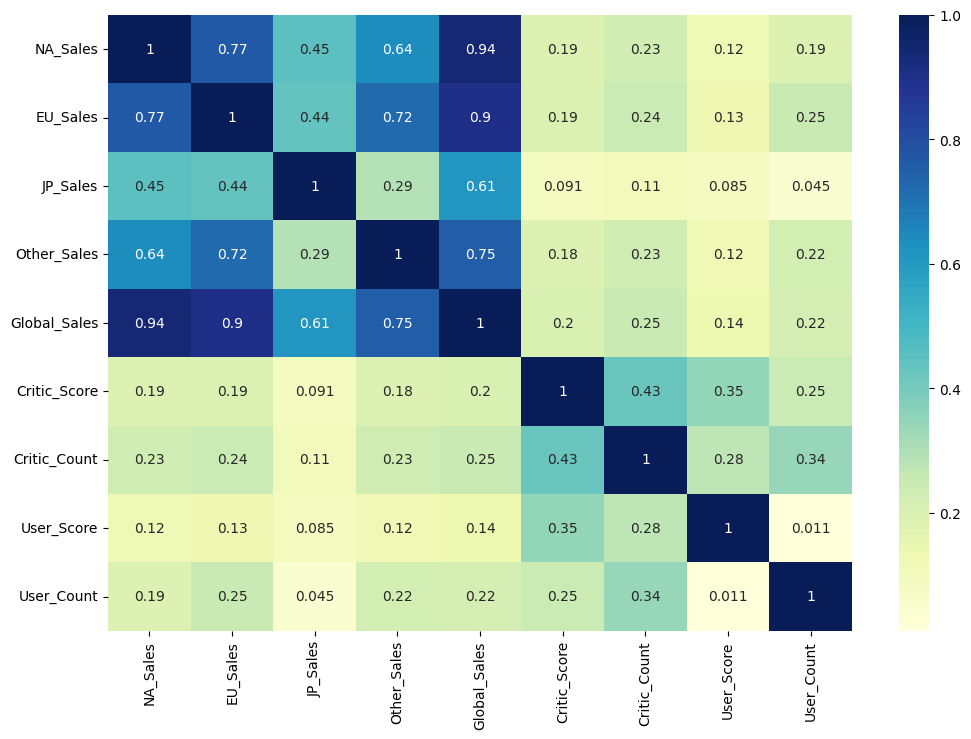

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(rdata.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [54]:
df.replace({'Genre':{'Sports':0,'Platform':1,'Racing':2,'Role-Playing':3,'Puzzle':4,'Misc':5,'Shooter':6,'Simulation':7,'Action':8,'Fighting':9,'Adventure':10,'Strategy':11,'NA':12}},inplace=True)

In [57]:
X=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
y=df['Global_Sales']
X.head()

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,0,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.00000,322.000000
1,Super Mario Bros.,1,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,5.39981,162.229908
2,Mario Kart Wii,2,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.30000,709.000000
3,Wii Sports Resort,0,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.00000,192.000000
4,Pokemon Red/Pokemon Blue,3,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,5.39981,162.229908


In [58]:
X['User_Score']=pd.to_numeric(X['User_Score'],errors='coerce')
X['User_Score']=X['User_Score'].fillna(0).astype(int)

<ipython-input-58-624715ee8bae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['User_Score']=pd.to_numeric(X['User_Score'],errors='coerce')
<ipython-input-58-624715ee8bae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['User_Score']=X['User_Score'].fillna(0).astype(int)


In [59]:
#Data splitting
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [61]:
games_train=x_train.iloc[:,[0]]
games_test=x_test.iloc[:,[0]]


In [72]:
X_train=x_train.iloc[:,1:]
X_test=x_test.iloc[:,1:]

In [73]:
X_train.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
12675,2,0.05,0.00,0.00,0.01,0.06,53.000000,5.000000,0,162.229908
7025,5,0.22,0.00,0.00,0.01,0.23,68.967679,26.360821,0,162.229908
11557,10,0.00,0.00,0.08,0.00,0.08,68.967679,26.360821,5,162.229908
11746,1,0.00,0.06,0.00,0.01,0.08,86.000000,11.000000,8,337.000000
16042,7,0.00,0.00,0.02,0.00,0.02,68.967679,26.360821,5,162.229908


In [74]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=200,learning_rate=0.08)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [75]:
y_pred=model.predict(X_test)
print(y_pred)

[0.18978006 0.4097839  0.2800186  ... 0.07001244 0.20025638 0.06001753]


In [78]:
#evaluation and prrediction
y_pred=y_pred.reshape(-1,1)
y_test=y_test.reshape(-1,1)
predictions=np.concatenate([games_test,y_pred,y_test],axis=1)
predictions=pd.DataFrame(predictions,columns=['Names','Predicted_Global_Sales','Actual_Global_sales'])

In [79]:
predictions.head()

,Names,Predicted_Global_Sales,Actual_Global_sales
0,R-Type Final,0.18978,0.19
1,The Terminator: Dawn of Fate,0.409784,0.41
2,Dead to Rights: Retribution,0.280019,0.28
3,Skylanders SWAP Force,2.148009,2.15
4,DiRT,1.050514,1.05
